In [68]:
#import delle librerie
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nltk as nl
import re
import seaborn as sns
import pandas as pd
import csv
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
nl.download('punkt')
nl.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import del corpus
ds=pd.read_csv('/content/drive/My Drive/Colab Notebooks/20190909_quesiti.csv', delimiter=';', encoding='utf-8')


In [0]:
#droppo tutto quello che non è 730
ds=ds[ds.Servizio=="730 Telematico"]


In [0]:
#setto l'id come indice
ds.set_index("IdPratica", inplace = True) 

In [0]:
#formattazione testo e tokenizzazione
ds["Quesito"]=ds['Quesito'].str.lower()
ds['Quesito'] = ds['Quesito'].str.replace('[^\w\s]',' ')
ds['tokenized_Quesito'] = ds.apply(lambda row: nl.word_tokenize(row['Quesito']), axis=1)
stop_words = nl.corpus.stopwords.words('italian')
my_stop_words=['gli', 'nel', 'cordiali', 'se', 'ho', 'con', '"', 'cortesemente', 'saluti', 'il', 'la', 'signora', 'del', 
               'puo', 'sigra', 'ra', 'ha', 'possibile', 'buona', 'nell', 'sara', 'oggetto', 'possono', 'avrei', 'buongiorno', 
               'di', 'vorrei', 'buon', 'all', 'sarà', 'buonasera', "'", 'distinti', 'essere', 'le', 'grazie', 'devo', 
               'bisogno', 'un', 'nostro', 'vi', 'che', 'giorno', 'può', 'sig', 'sera', 'in', 'chiede', 'salve', 'si', 
               'sono', 'signor', 'per', 'di', 'il', 'la', 'per', 'in', 'un', 'che', 'è', 'é',  
               'ha', 'grazie', 'del', 'l', 'nel', 'con', 'se', 'una', 'le', 'si', 'come', 'da', 'al', 'della',
               'i', 'mi', 'sono', 'ho', 'ma', 'saluti', 'dell', 'dei', 'possibile', 'alla', 'o', 'anche', 'dal',
               'dalle', 'posso', 'ad', 'fare', 'all', 'devo', 'gli', 'nella', 'cordiali', 'solo', 'cui', 'c', 'caso',
               'sapere', 'ci', 'lo', 'd', 'questo', 'ed', 'deve', 'fatto', 'nell', 'stata', 'chiedo', 'dalla', 'quindi',
               'vi', 'sia', 'salve', 'tale', 'oppure', 'abbiamo', 'ai', 'su', 'questa', 'possono', 'buon', 'oggetto',
               'viene', 'perchè', 'puo', 'vorrei', 'riscontro', 'porgo', 'attesa', 'richiede',   'vanno', 'portate', 
               'sensi', 'possa', 'buongiornoal', 'buongiornole', 'buongiornol', 'buongiornola',
               'chiediamo', 'relativa', 'parere', 'graziesaluti', 'gentilmente', 'dott', 'buongiornoé', 
               'tra', 'va', 'dall', 'sul', 'degli', 'hanno', 'più', 'avere', 'comunque', 'nostro', 'volevo',
               'sulla', 'era', 'mio', 'sig', 'suo', 'fa', 'ora', 'poi', 'ringrazio', 'però', 'punto',
               'cgn', 'uno', 'poter', 'merito', 'quest', 'potete', 'possiamo', 'dobbiamo', 'n', 'cortesemente',
               'sua', 'stati', 'presso', 'inoltre', 'essendo', 'buona', 'avendo', 'io', 'sufficiente', 'alle', 'tali',
               'richiede', 'chiediamo', 'andrebbe', 'eventualmente', 'sonia', 'indicata', 'trattasi', 'chiedervi',
               'chiedere', 'presente', 'buongiornoin', 'graziesaluti', 'credo', 'buongiornoho', 'qualche', 'vanno',
               'graziecordiali', 'buongiornola', 'vs', 'attesacordiali', 'graziemonica', 'graziesaluti',
               'maria', 'gentilmente', 'dott', 'fra', 'buongiornoé', 'buongiornola', 'buongiornoin', 'piu',
               'buongiornosono', 'buongiornosi', 'buongiornole', 'prego', 'salutistudio', 'mille']

stop_words = stop_words + my_stop_words

set(stop_words)



filtered_sentence=[]
for i in ds["tokenized_Quesito"]:
   filtered_sentence.append( [ w for w in i if not w in stop_words])
ds["filtered_sentence"]=filtered_sentence
stemmer = SnowballStemmer("italian")
ds['filtered_sentence'] = ds["filtered_sentence"].apply(lambda x: [stemmer.stem(y) for y in x])

In [0]:
#creo il csv aggiornato con la conta delle categorie
categorie=pd.DataFrame(ds['Categoria'].value_counts())
categorie.to_csv('./categorie.csv')

In [75]:
#guardo la frequenza delle parole nelle categorie più popolose

for k in range(10):
    fdist = FreqDist()
    for i in ds[ds['Categoria']==ds['Categoria'].value_counts().index[k]].filtered_sentence:
         for j in i:
            fdist[j] += 1
    print(ds['Categoria'].value_counts().index[k])
    fdist.plot(10)


Interventi recupero patrimonio edilizio


Spese sanitarie


Quadro C Lavoro dipendente


Altri oneri detraibili / deducibili


Spese istruzione


Versione Online


Chi può utilizzare il 730


Quadro B Fabbricati


Mutui


Familiari a carico


In [76]:
'''from nltk.probability import FreqDist
fdist = FreqDist()
for i in ds[ds['Categoria']==ds['Categoria'].value_counts().index[4]].filtered_sentence:
    for j in i:
        fdist[j] += 1
print(ds['Categoria'].value_counts().index[4])
fdist.plot(10)
fdist.pprint(10)
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist.to_csv("./freq_Spese_Istruzione.csv")
'''

'from nltk.probability import FreqDist\nfdist = FreqDist()\nfor i in ds[ds[\'Categoria\']==ds[\'Categoria\'].value_counts().index[4]].filtered_sentence:\n    for j in i:\n        fdist[j] += 1\nprint(ds[\'Categoria\'].value_counts().index[4])\nfdist.plot(10)\nfdist.pprint(10)\ndf_fdist = pd.DataFrame.from_dict(fdist, orient=\'index\')\ndf_fdist.columns = [\'Frequency\']\ndf_fdist.index.name = \'Term\'\ndf_fdist.to_csv("./freq_Spese_Istruzione.csv")\n'

In [0]:
rem_list=['non', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'q', 'w', 'k', 'giorno', 'marito']
for x in rem_list:
    if x in stop_words:
        stop_words.remove(x)

In [78]:
from collections import Counter 
  
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 
    
List = [2, 1, 2, 2, 1, 3] 
print(most_frequent(List)) 

2


In [79]:
#creo il modello
vectorizer = CountVectorizer(stop_words=stop_words,ngram_range=(1,2),min_df=0.005)
X = vectorizer.fit_transform(ds.Quesito)
true_k=17
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=50, n_init=1)
model.fit(X)
   
   
  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=17, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
# elbow curve per trovare il miglior K (17)

"""for i in range(1,20):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=1)
    model.fit(X)
    cost.append(model.inertia_)  
   
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot """

'for i in range(1,20):\n    model = KMeans(n_clusters=i, init=\'k-means++\', max_iter=50, n_init=1)\n    model.fit(X)\n    cost.append(model.inertia_)  \n   \n  \n# plot the cost against K values \nplt.plot(range(1, 11), cost, color =\'g\', linewidth =\'3\') \nplt.xlabel("Value of K") \nplt.ylabel("Sqaured Error (Cost)") \nplt.show() # clear the plot \nplt.plot(range(1, 20), cost, color =\'g\', linewidth =\'3\') \nplt.xlabel("Value of K") \nplt.ylabel("Sqaured Error (Cost)") \nplt.show() # clear the plot '

In [81]:
#aggiungo al dataframe iniziale il cluster di appartenenza di ogni pratica
prediction = model.predict(X)
print(prediction)
ds['cluster']=prediction


[ 7  2  2 ... 10  5 10]


In [82]:
#printo i termini che appaiono di più nei cluster e la categoria più rappresentata
from collections import Counter 
  
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 
    

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    print("categoria più frequente:", most_frequent(ds[ds.cluster==i].Categoria))
    for ind in order_centroids[i, :3]:
        print(' %s' % terms[ind])


Top terms per cluster:
Cluster 0:
categoria più frequente: Interventi recupero patrimonio edilizio
 non
 730
 contribuente
Cluster 1:
categoria più frequente: Versione Online
 730
 on
 line
Cluster 2:
categoria più frequente: Spese sanitarie
 spesa
 contribuente
 detraibile
Cluster 3:
categoria più frequente: Chi può utilizzare il 730
 modello
 730
 modello 730
Cluster 4:
categoria più frequente: Quadro F Acconti, Ritenute ed Eccedenze
 730
 non
 2019
Cluster 5:
categoria più frequente: Interventi recupero patrimonio edilizio
 moglie
 marito
 carico
Cluster 6:
categoria più frequente: Mutui
 mutuo
 interessi
 casa
Cluster 7:
categoria più frequente: Spese sanitarie
 spese
 non
 contribuente
Cluster 8:
categoria più frequente: Interventi recupero patrimonio edilizio
 ristrutturazione
 detrazione
 lavori
Cluster 9:
categoria più frequente: Interventi recupero patrimonio edilizio
 2018
 anno
 contribuente
Cluster 10:
categoria più frequente: Sostituto d'imposta
 sostituto
 730
 imposta
Cl

In [0]:
dfDummies=[]
dfDummies = pd.get_dummies(ds['Categoria'])

In [0]:
dfDummies

In [0]:
categories=pd.DataFrame()
#one hot encoding(inutile)
#categories=pd.concat([dfDummies,ds.cluster],axis=1)
#categories.sum(axis = 0, skipna = True)
#creo un dataframe con clusters e categorie (a)
a=[]
#for i in range(true_k):
#    a.append(ds[ds.cluster==i].sum(axis = 0, skipna = True))
    
a=pd.DataFrame(a)
b=pd.DataFrame({'cluster':np.array(range(true_k))})

a=pd.concat([b,a],axis=1)



730 integrativo  730/4  ...  Versione Piattaforma  Vigilanza/Privacy
IdPratica                          ...                                         
1451109                  0      0  ...                     0                  0
1451134                  0      1  ...                     0                  0
1451147                  0      0  ...                     0                  0
1447471                  0      0  ...                     1                  0
1447496                  0      0  ...                     0                  0
1447505                  0      0  ...                     0                  0
1447510                  0      0  ...                     0                  0
1447484                  0      0  ...                     0                  0
1447487                  0      0  ...                     0                  0
1447495                  0      0  ...                     0                  0
1447499                  0      0  ...                     0                  0
1447507                  0      0  ...                     0                  0
1447550                  0      0  ...                     0                  0
1447573                  0      0  ...                     0                  0
1447578                  0      0  ...                     0                  0
1447589                  0      0  ...                     0                  0
1447596                  0      0  ...                     0                  0
1447603                  0      0  ...                     0                  0
1446276                  0      0  ...                     0                  0
1446293                  0      0  ...                     0                  0
1446329                  0      0  ...                     0                  0
1446330                  0      0  ...                     0                  0
1447521                  0      0  ...                     0                  0
1447532                  0      0  ...                     0                  0
1447646                  0      0  ...                     0                  0
1447662                  0      0  ...                     0                  0
1447681                  0      0  ...                     0                  0
1447703                  0      0  ...                     0                  0
1446219                  0      0  ...                     0                  0
1446259                  0      0  ...                     0                  0
...                    ...    ...  ...                   ...                ...
1604328                  0      0  ...                     0                  0
1604329                  0      0  ...                     0                  0
1604332                  1      0  ...                     0                  0
1604389                  0      0  ...                     0                  0
1604399                  0      0  ...                     0                  0
1604391                  0      0  ...                     0                  0
1604394                  0      0  ...                     0                  0
1604397                  0      1  ...                     0                  0
1604398                  0      0  ...                     0                  0
1604401                  0      1  ...                     0                  0
1604407                  1      0  ...                     0                  0
1604408                  1      0  ...                     0                  0
1604410                  0      1  ...                     0                  0
1604412                  1      0  ...                     0                  0
1604414                  0      0  ...                     0                  0
1604432                  0      0  ...                     0                  0
1604413                  0      0  ...                     0                  0
1604419    

In [86]:

fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='w')
plt.hist(ds.cluster, true_k, facecolor='blue', alpha=0.5)
plt.show()

In [87]:
'''
sns.set(style="darkgrid")
fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='w')
ax = sns.countplot(x=ds[ds.cluster==28].Categoria ,)'''


'\nsns.set(style="darkgrid")\nfig=plt.figure(figsize=(10, 10), dpi= 120, facecolor=\'w\', edgecolor=\'w\')\nax = sns.countplot(x=ds[ds.cluster==28].Categoria ,)'

In [88]:
fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='w')
sns.barplot(list(range(true_k)), a[a.columns[0]])

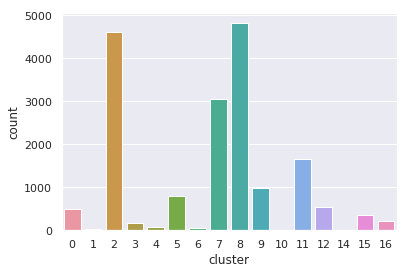

In [89]:

sns.set(style="darkgrid")
ax = sns.countplot(x=ds[ds.Categoria=='Interventi recupero patrimonio edilizio'].cluster,)